# $T_\varphi$ characterization

$T$ is defined as by $T_2*$ when removing the effect of $T_1$, or more precisely:
$ 1/T_2* = 1/2T_1 + 1/T_\varphi. $
We therefore create a composite experiment consisting of a $T_1$ experiment and a $T_2*$ experiment. From the results of these two, we compute the results for $T_\varphi.$

In [1]:
import numpy as np
import qiskit
from qiskit_experiments.library.characterization import Tphi
from qiskit_experiments.library.characterization import TphiAnalysis

In [2]:
# An Aer simulator
from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakeVigo(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakeVigo(), noise_model=noise_model)

# Time intervals to wait before measurement for t1 and t2
delays_t1 = np.arange(1e-6, 300e-6, 10e-6)
delays_t2 = np.arange(1e-6, 50e-6, 2e-6)



In [3]:
# Create an experiment for qubit 0 with the specified time intervals
exp = Tphi(qubit=0, delays_t1=delays_t1, delays_t2=delays_t2, osc_freq=1e5)

expdata = exp.run(backend=backend, analysis=TphiAnalysis()).block_for_results()
result = expdata.analysis_results("T_phi")

In [4]:
# Print the result for T_phi
print(result)

DbAnalysisResultV1
- name: T_phi
- value: 1.8373287226570817e-05 ± 7.864423752011586e-07
- quality: good
- device_components: ['Q0']
- verified: False


In [5]:
# It is possible to see the results of the sub-experiments:
print(expdata)

---------------------------------------------------
Experiment: Tphi
Experiment ID: fcc3837f-2cc4-41bc-8f4b-1de317715c31
Child Experiment Data: 2
Status: ExperimentStatus.DONE
Backend: aer_simulator(fake_vigo)
Data: 55
Analysis Results: 1
Figures: 0


In [6]:
print(expdata.child_data(0).analysis_results("T1"))

DbAnalysisResultV1
- name: T1
- value: 0.00012821215288590858 ± 3.3260399210883496e-06 s
- χ²: 1.1382183477608774
- quality: good
- device_components: ['Q0']
- verified: False


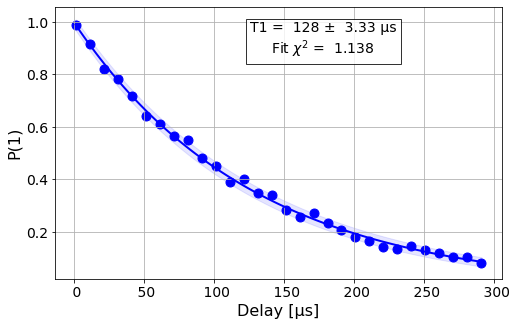

In [7]:
display(expdata.child_data(0).figure(0))

In [8]:
print(expdata.child_data(1).analysis_results("T2star"))

DbAnalysisResultV1
- name: T2star
- value: 1.7144827836418695e-05 ± 6.841472018731765e-07 s
- χ²: 0.7760850414846832
- quality: good
- device_components: ['Q0']
- verified: False


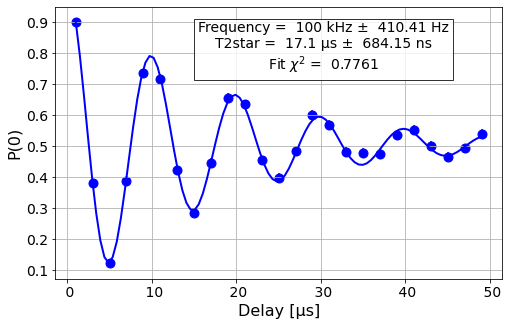

In [9]:
display(expdata.child_data(1).figure(0))